In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Dataset.csv',sep=';')
df.shape

(1311, 20)

In [8]:
# Removing duplicate rows if any
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

Shape After deleting duplicate values: (1311, 20)


In [9]:
df.head()

,Target,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,1,B,46,A,26.0,A,2,1.0,0,3.0,A,900000,221,8161,1084000.0,13593,1054170,0.6003,77.5524,0.8303
1,1,B,33,B,156.0,A,11,2.0,3,3.0,C,900000,208,7675,926000.0,13590,1149917,0.5648,84.6149,0.9719
2,1,B,53,A,75.0,A,6,2.0,3,3.0,C,800000,166,8317,988000.0,11394,751271,0.7299,65.9357,0.8097
3,1,B,49,A,254.0,B,5,1.0,3,3.0,C,240000,165,2585,282000.0,10618,100850,0.2435,9.4980,0.8511
4,1,B,45,A,218.0,A,6,2.0,2,3.0,C,480000,122,5749,486000.0,8727,270985,0.6587,31.0513,0.9877


# Defining the problem statement:
•	Le calcul automatique de la probabilité d’affectation au groupe 1 (Target=1) déterminée selon 4 méthodes d’apprentissage différentes (choix libre) avec un affichage par ordre décroissant du résultat.

## Determining the type of Machine Learning :
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.
## Looking at the distribution of Target variable
- If target variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

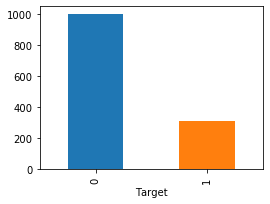

In [10]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=df.groupby('Target').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

In [11]:
#summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 20 columns):
Target    1311 non-null int64
X1        1311 non-null object
X2        1311 non-null int64
X3        1311 non-null object
X4        1301 non-null float64
X5        1311 non-null object
X6        1311 non-null int64
X7        1295 non-null float64
X8        1311 non-null int64
X9        1295 non-null float64
X10       1311 non-null object
X11       1311 non-null int64
X12       1311 non-null int64
X13       1311 non-null int64
X14       1311 non-null float64
X15       1311 non-null int64
X16       1311 non-null int64
X17       1311 non-null float64
X18       1311 non-null float64
X19       1311 non-null float64
dtypes: float64(7), int64(9), object(4)
memory usage: 215.1+ KB
None


In [12]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,Target,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
count,1311.000000,1311,1311.000000,1311,1301.000000,1311,1311.000000,1295.000000,1311.000000,1295.000000,1311,1311.000000,1311.000000,1311.000000,1.311000e+03,1311.000000,1.311000e+03,1311.000000,1311.000000,1311.000000
unique,NaN,2,NaN,3,NaN,2,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,A,NaN,A,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,939,NaN,687,NaN,927,NaN,NaN,NaN,NaN,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.237223,NaN,43.799390,NaN,124.961568,NaN,9.075515,1.135135,1.926773,3.566023,NaN,90565.524027,180.424867,892.991609,1.333275e+05,3130.174676,8.027796e+04,0.294270,26.822755,0.703084
std,0.425543,NaN,8.229635,NaN,77.678321,NaN,3.542277,0.342000,1.169906,0.585836,NaN,93639.333230,35.375525,930.175075,1.313124e+05,2679.944973,9.182600e+04,0.109059,13.672382,0.172497
min,0.000000,NaN,5.000000,NaN,3.000000,NaN,1.000000,1.000000,0.000000,1.000000,NaN,7000.000000,120.000000,68.000000,8.000000e+03,701.000000,5.391000e+03,0.075800,4.772600,0.312500
25%,0.000000,NaN,38.000000,NaN,66.000000,NaN,6.000000,1.000000,1.000000,3.000000,NaN,40000.000000,148.000000,395.500000,5.964157e+04,1320.000000,3.296200e+04,0.215800,16.758600,0.555200
50%,0.000000,NaN,43.000000,NaN,108.000000,NaN,11.000000,1.000000,2.000000,4.000000,NaN,60000.000000,183.000000,596.000000,9.470075e+04,2254.000000,5.376000e+04,0.285100,24.236500,0.724000
75%,0.000000,NaN,49.000000,NaN,171.000000,NaN,12.000000,1.000000,3.000000,4.000000,NaN,100000.000000,211.000000,1059.000000,1.563479e+05,4090.000000,9.367800e+04,0.364200,34.358300,0.844650


In [13]:
df.head()

,Target,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,1,B,46,A,26.0,A,2,1.0,0,3.0,A,900000,221,8161,1084000.0,13593,1054170,0.6003,77.5524,0.8303
1,1,B,33,B,156.0,A,11,2.0,3,3.0,C,900000,208,7675,926000.0,13590,1149917,0.5648,84.6149,0.9719
2,1,B,53,A,75.0,A,6,2.0,3,3.0,C,800000,166,8317,988000.0,11394,751271,0.7299,65.9357,0.8097
3,1,B,49,A,254.0,B,5,1.0,3,3.0,C,240000,165,2585,282000.0,10618,100850,0.2435,9.4980,0.8511
4,1,B,45,A,218.0,A,6,2.0,2,3.0,C,480000,122,5749,486000.0,8727,270985,0.6587,31.0513,0.9877


In [14]:
df.nunique()

Target       2
X1           2
X2          53
X3           3
X4         301
X5           2
X6          12
X7           2
X8           6
X9           4
X10          4
X11        144
X12        121
X13        889
X14       1177
X15       1143
X16       1304
X17       1117
X18       1308
X19       1046
dtype: int64

->Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous

# Visual Exploratory Data Analysis
- Categorical variables: Bar plot
- Continuous variables: Histogram

In [15]:
# Plotting multiple bar charts at once for categorical variables


def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,4))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

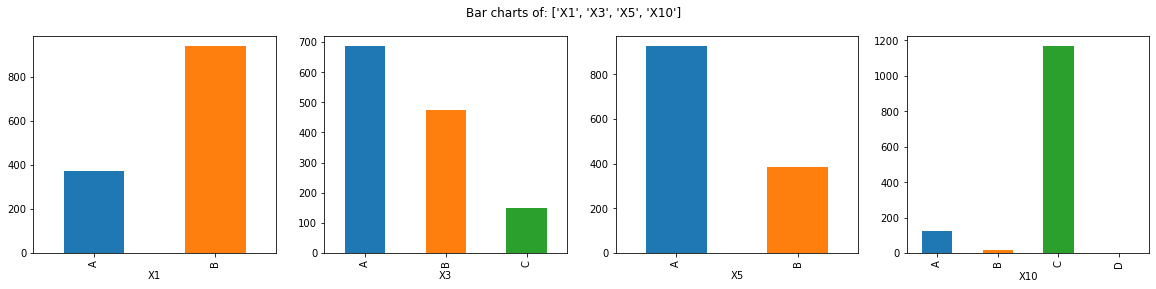

In [16]:
# Calling the function 
PlotBarCharts(inpData=df, 
              colsToPlot=['X1', 'X3', 'X5','X10'])

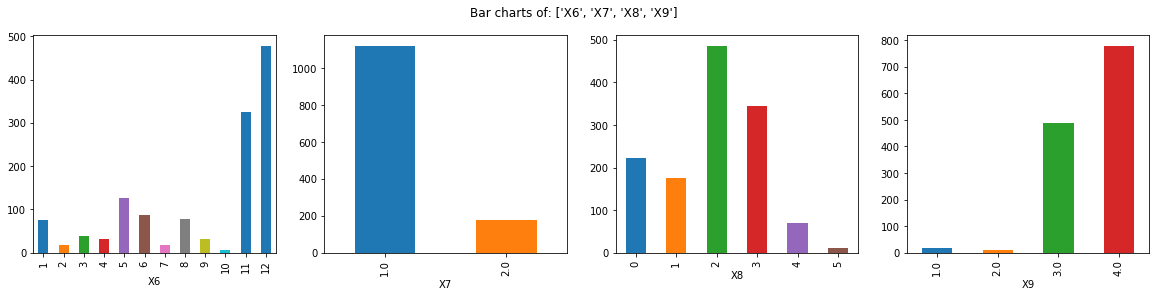

In [17]:

# Calling the function 
PlotBarCharts(inpData=df, 
              colsToPlot=['X6', 'X7', 'X8','X9'])

All the categorical variables are selected with a doubt on "X10" and "X7" because there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In [18]:
numerical = df.select_dtypes(include=['int64','float64'])
numerical.columns

Index(['Target', 'X2', 'X4', 'X6', 'X7', 'X8', 'X9', 'X11', 'X12', 'X13',
       'X14', 'X15', 'X16', 'X17', 'X18', 'X19'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000698AA06E80>,
      dtype=object)

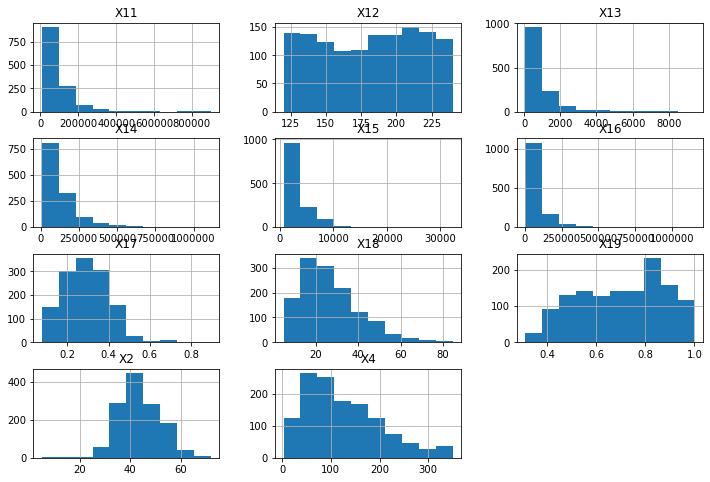

In [19]:
df.hist(['X2', 'X4', 'X11', 'X12', 'X13','X14', 'X15', 'X16', 'X17', 'X18', 'X19'], figsize=(12,8))

# Missing values treatment

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables

In [20]:
#Checking percentage of null values present in dataset 
missing_num= df[df.columns].isna().sum().sort_values(ascending=False)
missing_perc= (df[df.columns].isna().sum()/len(df)*100).sort_values(ascending=False)
missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
missing_df= missing[missing['Percentage']>0]
missing_df

,Total,Percentage
X9,16,1.220442
X7,16,1.220442
X4,10,0.762777


In [21]:
df['X9'] = df['X9'].fillna(df['X9'].dropna().mean())
df['X7'] = df['X7'].fillna(df['X7'].dropna().mean())
df['X4'] = df['X4'].fillna(df['X4'].dropna().mean())

# Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.
In this case study the Target variable is categorical, hence below two scenarios will be present:

- Categorical Target Variable Vs Continuous Predictor
- Categorical Target Variable Vs Categorical Predictor

## Visual exploration of relationship between variables
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

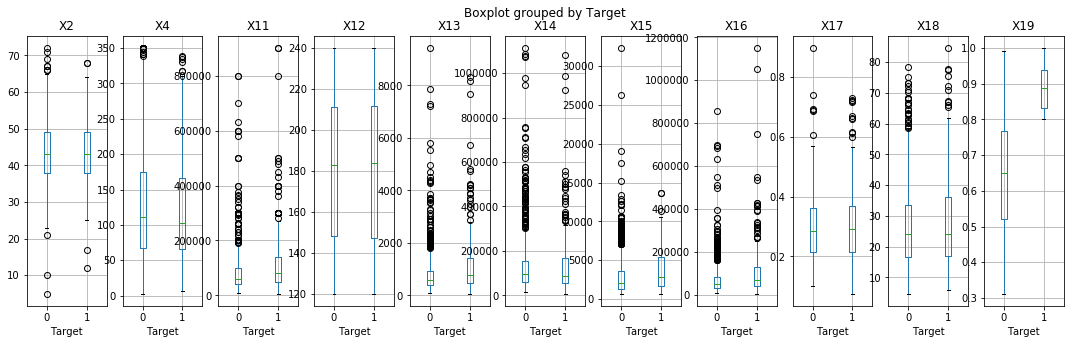

In [22]:
# Box plots for Categorical Target Variable and continuous predictors
ContinuousColsList=['X2', 'X4', 'X11', 'X12', 'X13','X14', 'X15', 'X16', 'X17', 'X18', 'X19']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='Target', figsize=(5,5), vert=True, ax=PlotCanvas[i])

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
The other other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.
We confirm this by looking at the results of ANOVA test below

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [24]:
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=df, TargetVariable='Target', ContinuousPredictorList=ContinuousColsList)

##### ANOVA Results ##### 

X2 is NOT correlated with Target | P-Value: 0.3142336079951959
X4 is NOT correlated with Target | P-Value: 0.07905044747605407
X11 is correlated with Target | P-Value: 4.577593787291767e-09
X12 is NOT correlated with Target | P-Value: 0.7053412864814064
X13 is correlated with Target | P-Value: 7.272379073851776e-09
X14 is NOT correlated with Target | P-Value: 0.9453378332914918
X15 is correlated with Target | P-Value: 2.943202617643978e-07
X16 is correlated with Target | P-Value: 2.1379160745195407e-08
X17 is NOT correlated with Target | P-Value: 0.16581356182658316
X18 is NOT correlated with Target | P-Value: 0.23710761672337194
X19 is correlated with Target | P-Value: 8.270542778778926e-130


['X11', 'X13', 'X15', 'X16', 'X19']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

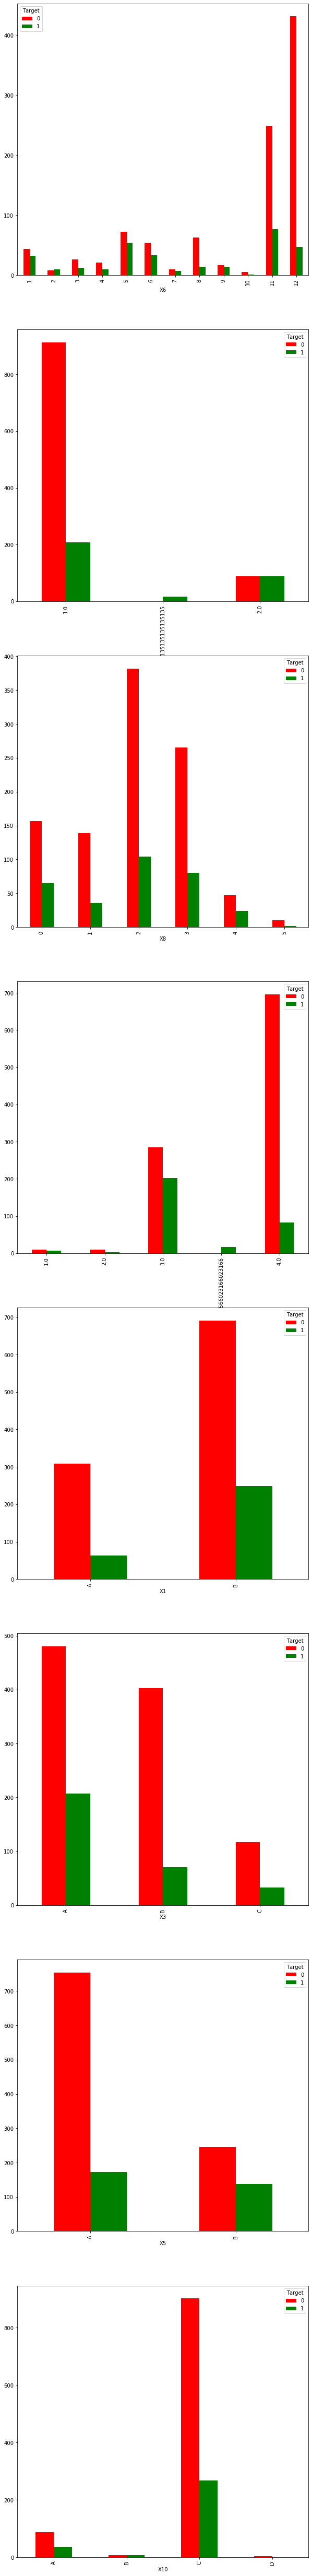

In [25]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['X6', 'X7', 'X8','X9','X1', 'X3', 'X5','X10']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Target'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True

In [26]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)


In [27]:
CategoricalVariables=['X6', 'X7', 'X8','X9','X1', 'X3', 'X5','X10']

# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='Target',
              CategoricalVariablesList= CategoricalVariables)


X6 is correlated with Target | P-Value: 1.629274744318748e-21
X7 is correlated with Target | P-Value: 2.0855284927732096e-30
X8 is NOT correlated with Target | P-Value: 0.06060563894014017
X9 is correlated with Target | P-Value: 7.01517233329225e-45
X1 is correlated with Target | P-Value: 0.0003651672446077749
X3 is correlated with Target | P-Value: 1.6294599593094858e-08
X5 is correlated with Target | P-Value: 3.578611484983834e-11
X10 is correlated with Target | P-Value: 0.03906619142904589


['X6', 'X7', 'X9', 'X1', 'X3', 'X5', 'X10']

# Selecting final predictors for Machine Learning
['X6', 'X7', 'X9', 'X1', 'X3', 'X5', 'X10','X11', 'X13', 'X15', 'X16', 'X19']

In [28]:
SelectedColumns=['X6', 'X7', 'X9', 'X1', 'X3', 'X5', 'X10','X11', 'X13', 'X15', 'X16', 'X19']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,X6,X7,X9,X1,X3,X5,X10,X11,X13,X15,X16,X19
0,2,1.0,3.0,B,A,A,A,900000,8161,13593,1054170,0.8303
1,11,2.0,3.0,B,B,A,C,900000,7675,13590,1149917,0.9719
2,6,2.0,3.0,B,A,A,C,800000,8317,11394,751271,0.8097
3,5,1.0,3.0,B,A,B,C,240000,2585,10618,100850,0.8511
4,6,2.0,3.0,B,A,A,C,480000,5749,8727,270985,0.9877


# Data Pre-processing for Machine Learning

In [29]:
print("X1 : ",df.X1.unique())
print("X3 : ",df.X3.unique())
print("X5 : ",df.X5.unique())
print("X10 : ",df.X10.unique())

X1 :  ['B' 'A']
X3 :  ['A' 'B' 'C']
X5 :  ['A' 'B']
X10 :  ['A' 'C' 'B' 'D']


In [30]:
DataForML['X1'] = DataForML['X1'].map({"A":0,"B":1 })
DataForML['X3'] = DataForML['X3'].map({"A":0,"B":1 ,"C":2})
DataForML['X5'] = DataForML['X5'].map({"A":0,"B":1 })
DataForML['X10'] = DataForML['X10'].map({"A":0,"B":1 ,"C":2, "D":3})

In [31]:
# Adding Target Variable to the data
DataForML['Target']=df['Target']

In [32]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [33]:
# Printing all the column names for our reference
DataForML.columns

Index(['X6', 'X7', 'X9', 'X1', 'X3', 'X5', 'X10', 'X11', 'X13', 'X15', 'X16',
       'X19', 'Target'],
      dtype='object')

In [34]:
TargetVariable='Target'
Predictors=['X6', 'X7', 'X9', 'X1', 'X3', 'X5', 'X10', 'X11', 'X13', 'X15', 'X16',
       'X19']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Logistic Regression

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.87      0.94      0.91       301
           1       0.74      0.56      0.64        93

    accuracy                           0.85       394
   macro avg       0.81      0.75      0.77       394
weighted avg       0.84      0.85      0.84       394

[[283  18]
 [ 41  52]]
Accuracy of the model on Testing Sample Data: 0.84


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Conve


Accuracy values for 10-fold Cross Validation:
 [0.79506934 0.83220388 0.81464742 0.83461866 0.80964733 0.84378803
 0.87613243 0.82643114 0.86200483 0.80253521]

Final Average Accuracy of the model: 0.83


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


# Decision Trees

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       301
           1       0.78      0.74      0.76        93

    accuracy                           0.89       394
   macro avg       0.85      0.84      0.84       394
weighted avg       0.89      0.89      0.89       394

[[281  20]
 [ 24  69]]
Accuracy of the model on Testing Sample Data: 0.89

Accuracy values for 10-fold Cross Validation:
 [0.88299663 0.82677329 0.81128489 0.90399747 0.87643161 0.85265498
 0.91876709 0.89612621 0.91648598 0.67858032]

Final Average Accuracy of the model: 0.86


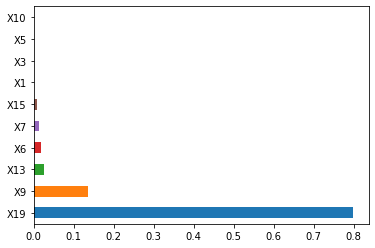

In [36]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [37]:
metrics.classification_report(y_test, prediction, output_dict=True)['1']

{'precision': 0.7752808988764045,
 'recall': 0.7419354838709677,
 'f1-score': 0.7582417582417582,
 'support': 93}

# Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       301
           1       0.78      0.82      0.80        93

    accuracy                           0.90       394
   macro avg       0.86      0.87      0.87       394
weighted avg       0.90      0.90      0.90       394

[[279  22]
 [ 17  76]]
Accuracy of the model on Testing Sample Data: 0.9

Accuracy values for 10-fold Cross Validation:
 [0.87690877 0.84120885 0.79547788 0.87445823 0.86098556 0.8457701
 0.88611725 0.90482367 0.9001968  0.79419916]

Final Average Accuracy of the model: 0.86


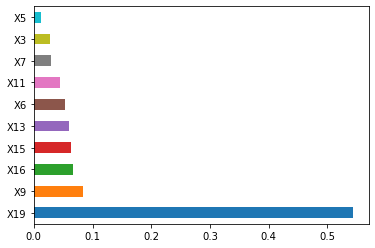

In [38]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       301
           1       0.73      0.82      0.77        93

    accuracy                           0.89       394
   macro avg       0.84      0.86      0.85       394
weighted avg       0.89      0.89      0.89       394

[[273  28]
 [ 17  76]]
Accuracy of the model on Testing Sample Data: 0.89

Accuracy values for 10-fold Cross Validation:
 [0.88510414 0.81404035 0.80721372 0.843621   0.6358349  0.83220388
 0.86788864 0.86666283 0.85920443 0.71137318]

Final Average Accuracy of the model: 0.81


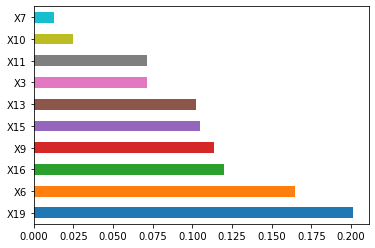

In [39]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[23:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       301
           1       0.78      0.83      0.80        93

    accuracy                           0.90       394
   macro avg       0.86      0.88      0.87       394
weighted avg       0.91      0.90      0.90       394

[[279  22]
 [ 16  77]]
Accuracy of the model on Testing Sample Data: 0.9
[23:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy values for 10-fold Cross Validation:
 [0.91284107 0.82001184 0.81383453 0.88386763 0.78098468 0.81006972
 0.89425987 0.86611987 0.88484246 0.82240289]

Final Average Accuracy of the model: 0.85


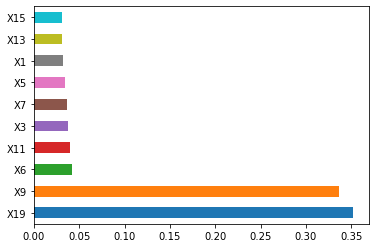

In [40]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# SVM

In [41]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, gamma=0.1)


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      1.00      0.87       301
           1       0.00      0.00      0.00        93

    accuracy                           0.76       394
   macro avg       0.38      0.50      0.43       394
weighted avg       0.58      0.76      0.66       394

[[301   0]
 [ 93   0]]
Accuracy of the model on Testing Sample Data: 0.66

Accuracy values for 10-fold Cross Validation:
 [0.65308255 0.66091669 0.66091669 0.66091669 0.66091669 0.66091669
 0.66091669 0.66091669 0.66091669 0.66091669]

Final Average Accuracy of the model: 0.66


# Deployment of the *Model*

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing Random Forest as the final model since it is very fast on this high dimensional data.

In order to deploy the model we follow below steps

Train the model using 100% data available
Save the model as a serialized file which can be stored anywhere
Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

# Choosing only the most important variables¶
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'X19','X9', 'X15','X16','X13' and 'X6'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='Target'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['X19','X9', 'X15','X16','X13' , 'X6']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

print(X.shape)
print(y.shape)

(1311, 6)
(1311,)


## Step 1. Retraining the model using 100% data


In [43]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')

# Training the model on 100% Data available
RF=clf.fit(X,y)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.86320809 0.81470448 0.78886272 0.85170286 0.78426214 0.84818447
 0.87093288 0.85265498 0.89425987 0.74127241]

Final Average Accuracy of the model: 0.83


##Step 2. Save the model as a serialized file which can be stored anywhere

In [44]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('RF.pkl', 'wb') as fileWriteStream:
    pickle.dump(RF, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\PC\My_App


In [50]:
!pip install gunicorn

# Deploying a predictive model as an API
Django and flask are two popular ways to deploy predictive models as a web service
You can call your predictive models using a URL from any front end like tableau, java or angular js.


In [ ]:
#import os
#os.mkdir('templates')
#os.mkdir('static')

In [45]:
index = '''
<!DOCTYPE html>
<html >
<head>
  <meta charset="UTF-8">
  <title>ML Deployment</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
  
</head>
<body>
 <div class="login">
	<h1>Predict Target Class</h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}"method="post">
    	
    	<input type="text" name="X19" placeholder="first variable" required="required" />
        <input type="text" name="X9" placeholder="second variable" required="required" />
		<input type="text" name="X15" placeholder="third variable" required="required" />
		<input type="text" name="X16" placeholder="fourth variable" required="required" />
    <input type="text" name="X13" placeholder="fifth variable"  />
    <input type="text" name="X6" placeholder="sixth variable"  />

        <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
    </form>
   <br>
   <table>
   <tr>
        <th>Model</th>
        <th> accuracy</th>
        <th>f1_score</th>
        <th>precision</th>
        <th>recall</th>
    </tr>

       {% for key, value in results.items() %}        
        <tr>
        <td>{{key}}</td>
        <td>{{value['accuracy']}}</td>
        <td>{{value['f1-score']}}</td>
        <td>{{value['precision']}}</td>
        <td>{{value['recall']}}</td>
        
          </tr>
      {% endfor %} 
      </table>
   <br>

   <br>
 </div>
</body>
</html>
'''
file = open("templates/index.html","w")
file.write(index)
file.close()

In [46]:
style = '''
@import url(https://fonts.googleapis.com/css?family=Open+Sans);
.btn { display: inline-block; *display: inline; *zoom: 1; padding: 4px 10px 4px; margin-bottom: 0; font-size: 13px; line-height: 18px; color: #333333; text-align: center;text-shadow: 0 1px 1px rgba(255, 255, 255, 0.75); vertical-align: middle; background-color: #f5f5f5; background-image: -moz-linear-gradient(top, #ffffff, #e6e6e6); background-image: -ms-linear-gradient(top, #ffffff, #e6e6e6); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#ffffff), to(#e6e6e6)); background-image: -webkit-linear-gradient(top, #ffffff, #e6e6e6); background-image: -o-linear-gradient(top, #ffffff, #e6e6e6); background-image: linear-gradient(top, #ffffff, #e6e6e6); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#ffffff, endColorstr=#e6e6e6, GradientType=0); border-color: #e6e6e6 #e6e6e6 #e6e6e6; border-color: rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.25); border: 1px solid #e6e6e6; -webkit-border-radius: 4px; -moz-border-radius: 4px; border-radius: 4px; -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); -moz-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); cursor: pointer; *margin-left: .3em; }
.btn:hover, .btn:active, .btn.active, .btn.disabled, .btn[disabled] { background-color: #e6e6e6; }
.btn-large { padding: 9px 14px; font-size: 15px; line-height: normal; -webkit-border-radius: 5px; -moz-border-radius: 5px; border-radius: 5px; }
.btn:hover { color: #333333; text-decoration: none; background-color: #e6e6e6; background-position: 0 -15px; -webkit-transition: background-position 0.1s linear; -moz-transition: background-position 0.1s linear; -ms-transition: background-position 0.1s linear; -o-transition: background-position 0.1s linear; transition: background-position 0.1s linear; }
.btn-primary, .btn-primary:hover { text-shadow: 0 -1px 0 rgba(0, 0, 0, 0.25); color: #ffffff; }
.btn-primary.active { color: rgba(255, 255, 255, 0.75); }
.btn-primary { background-color: #4a77d4; background-image: -moz-linear-gradient(top, #6eb6de, #4a77d4); background-image: -ms-linear-gradient(top, #6eb6de, #4a77d4); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#6eb6de), to(#4a77d4)); background-image: -webkit-linear-gradient(top, #6eb6de, #4a77d4); background-image: -o-linear-gradient(top, #6eb6de, #4a77d4); background-image: linear-gradient(top, #6eb6de, #4a77d4); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#6eb6de, endColorstr=#4a77d4, GradientType=0);  border: 1px solid #3762bc; text-shadow: 1px 1px 1px rgba(0,0,0,0.4); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.5); }
.btn-primary:hover, .btn-primary:active, .btn-primary.active, .btn-primary.disabled, .btn-primary[disabled] { filter: none; background-color: #4a77d4; }
.btn-block { width: 100%; display:block; }

* { -webkit-box-sizing:border-box; -moz-box-sizing:border-box; -ms-box-sizing:border-box; -o-box-sizing:border-box; box-sizing:border-box; }
body { 
	width: 100%;
	font-family: 'Open Sans', sans-serif;
	background: #092756;
	color: #fff;
	font-size: 18px;
	text-align:center;
	letter-spacing:1.2px;
	background: -moz-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%),-moz-linear-gradient(top,  rgba(57,173,219,.25) 0%, rgba(42,60,87,.4) 100%), -moz-linear-gradient(-45deg,  #670d10 0%, #092756 100%);
	background: -webkit-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -webkit-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -webkit-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -o-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -o-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -o-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -ms-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), -ms-linear-gradient(top,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), -ms-linear-gradient(-45deg,  #670d10 0%,#092756 100%);
	background: -webkit-radial-gradient(0% 100%, ellipse cover, rgba(104,128,138,.4) 10%,rgba(138,114,76,0) 40%), linear-gradient(to bottom,  rgba(57,173,219,.25) 0%,rgba(42,60,87,.4) 100%), linear-gradient(135deg,  #670d10 0%,#092756 100%);

}
.login { 
	position: absolute;
	top: 40%;
	left: 50%;
	margin: -150px 0 0 -150px;
	width:400px;
	height:400px;
}

.login h1 { color: #fff; text-shadow: 0 0 10px rgba(0,0,0,0.3); letter-spacing:1px; text-align:center; }

input { 
	width: 100%; 
	margin-bottom: 10px; 
	background: rgba(0,0,0,0.3);
	border: none;
	outline: none;
	padding: 10px;
	font-size: 13px;
	color: #fff;
	text-shadow: 1px 1px 1px rgba(0,0,0,0.3);
	border: 1px solid rgba(0,0,0,0.3);
	border-radius: 4px;
	box-shadow: inset 0 -5px 45px rgba(100,100,100,0.2), 0 1px 1px rgba(255,255,255,0.2);
	-webkit-transition: box-shadow .5s ease;
	-moz-transition: box-shadow .5s ease;
	-o-transition: box-shadow .5s ease;
	-ms-transition: box-shadow .5s ease;
	transition: box-shadow .5s ease;
}
input:focus { box-shadow: inset 0 -5px 45px rgba(100,100,100,0.4), 0 1px 1px rgba(255,255,255,0.2); }

'''
file = open("static/style.css","w")
file.write(style)
file.close()

In [47]:
!pip install flask


In [49]:
# importing necessary libraries and functions
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
import json



app = Flask(__name__)


model = pickle.load(open('RF.pkl', 'rb')) # loading the trained model

@app.route('/') # Homepage
def home():
    return render_template('index.html', results={})

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    
    # retrieving values from form
    Predictors= [x for x in request.form.values()]
    TargetVariable='Target'
    f = set([ 'X' + str(i) for i in range(1,20)])
    if ( not f):
        
        return render_template('index.html', prediction_text='error in choice: {}') # rendering the predicted result

    X=DataForML[Predictors].values
    y=DataForML[TargetVariable].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
    #prediction = model.predict(final_features) # making prediction

# Adaboost 

    # Choosing Decision Tree with 1 level as the weak learner
    # Choose different values of max_depth, n_estimators and learning_rate to tune the model
    DTC=DecisionTreeClassifier(max_depth=4)
    clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

    # Printing all the parameters of Adaboost

    # Creating the model on Training Data
    AB=clf.fit(X_train,y_train)
    prediction=AB.predict(X_test)

    # Measuring accuracy on Testing Data
    from sklearn import metrics
    tree_metrics = metrics.classification_report(y_test, prediction,output_dict=True)['1']
    tree_metrics.pop('support',None)
    tree_metrics['accuracy'] = metrics.accuracy_score(y_test, prediction)
    for item in tree_metrics:
        tree_metrics[item] = round(tree_metrics[item], 2)
    r = {}
    r['decision tree'] = tree_metrics


    from sklearn.linear_model import LogisticRegression
    # choose parameter Penalty='l1' or C=1
    # choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
    clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

    # Printing all the parameters of logistic regression
    # print(clf)

    # Creating the model on Training Data
    LOG=clf.fit(X_train,y_train)
    prediction=LOG.predict(X_test)

    # Measuring accuracy on Testing Data

    logistic_metrics = metrics.classification_report(y_test, prediction,output_dict=True)['1']
    logistic_metrics.pop('support',None)
    logistic_metrics['accuracy'] = metrics.accuracy_score(y_test, prediction)
    for item in logistic_metrics:
        logistic_metrics[item] = round(logistic_metrics[item], 2)
    r['logistic regression'] = logistic_metrics


    from sklearn.ensemble import RandomForestClassifier
    # Choose various values of max_depth, n_estimators and criterion for tuning the model
    clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


    forest_metrics = metrics.classification_report(y_test, prediction,output_dict=True)['1']
    forest_metrics.pop('support',None)
    forest_metrics['accuracy'] = metrics.accuracy_score(y_test, prediction)
    for item in forest_metrics:
        forest_metrics[item] = round(forest_metrics[item], 2)
    r['random forest'] = forest_metrics


# Printing all the parameters of Random Forest
    from sklearn import svm
    clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

    # Printing all the parameters of KNN
    print(clf)

    # Creating the model on Training Data
    SVM=clf.fit(X_train,y_train)
    prediction=SVM.predict(X_test)

    svm_metrics = metrics.classification_report(y_test, prediction,output_dict=True)['1']
    svm_metrics.pop('support',None)
    svm_metrics['accuracy'] = metrics.accuracy_score(y_test, prediction)
    for item in svm_metrics:
        
        svm_metrics[item] = round(svm_metrics[item], 2)
    r['SVM'] = svm_metrics

    # Plotting the feature importance for Top 10 most important columns
    print('r',r)
    r = json.dumps(r)
    r = json.loads(r)






    return render_template('index.html', results=r) # rendering the predicted result

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Apr/2021 23:23:36] "GET / HTTP/1.1" 200 -
[2021-04-25 23:23:47,450] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\PC\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\PC\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\PC\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\PC\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\PC\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\PC\Anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoin

SVC(C=2, gamma=0.1)


127.0.0.1 - - [25/Apr/2021 23:27:51] "POST /predict HTTP/1.1" 200 -


r {'decision tree': {'precision': 0.41, 'recall': 0.14, 'f1-score': 0.21, 'accuracy': 0.75}, 'logistic regression': {'precision': 0.33, 'recall': 0.1, 'f1-score': 0.15, 'accuracy': 0.74}, 'random forest': {'precision': 0.33, 'recall': 0.1, 'f1-score': 0.15, 'accuracy': 0.74}, 'SVM': {'precision': 0.38, 'recall': 0.1, 'f1-score': 0.15, 'accuracy': 0.75}}


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


SVC(C=2, gamma=0.1)


127.0.0.1 - - [25/Apr/2021 23:27:53] "POST /predict HTTP/1.1" 200 -


r {'decision tree': {'precision': 0.41, 'recall': 0.14, 'f1-score': 0.21, 'accuracy': 0.75}, 'logistic regression': {'precision': 0.33, 'recall': 0.1, 'f1-score': 0.15, 'accuracy': 0.74}, 'random forest': {'precision': 0.33, 'recall': 0.1, 'f1-score': 0.15, 'accuracy': 0.74}, 'SVM': {'precision': 0.38, 'recall': 0.1, 'f1-score': 0.15, 'accuracy': 0.75}}


NameError: ignored